In [5]:
# regression 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [14]:
data = make_regression(n_samples=1000, n_features=5, noise=0.2, random_state=42)
data[0].shape

(1000, 5)

In [19]:
X = data[0] # This is our input valules

In [28]:
X[0] # This is our First sample

array([ 2.13685019,  0.59941972,  0.48200818, -1.17746225,  0.42508706])

In [20]:
y = data[1]

In [21]:
y[0]

np.float64(74.8638525346159)

In [15]:
from sklearn.preprocessing import StandardScaler #Scales the data

In [22]:
scaler = StandardScaler() 
X = scaler.fit_transform(X) # Both fit and transform at the same time we could do this after spliting of test and training sets 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train.shape

(800, 5)

In [26]:
y_train.shape

(800,)

In [29]:
import tensorflow as tf

2025-01-23 11:45:17.097897: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 11:45:17.100846: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 11:45:17.110007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737620117.124849    7066 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737620117.129266    7066 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-23 11:45:17.144336: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [39]:
model = tf.keras.models.Sequential(
    [   
        tf.keras.layers.Input(shape = (5, )), # Input layer
        tf.keras.layers.Dense(units = 16, activation = 'relu'), # Fully connted units -> neural number
        tf.keras.layers.Dense(units = 16, activation = 'relu'),
        tf.keras.layers.Dense(units = 1, activation = 'linear'), # Output layer
    ]
)

In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = (5, )))
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

In [47]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
#ALSO CAN USE: from tensorflow.keras.layers import Desnse, Dropout

In [57]:
loss= tf.losses.MeanSquaredError()
opt = tf.optimizers.Adam()
model.compile(loss = loss, optimizer = opt) 

In [65]:
model.fit(X_train, y_train, validation_split = 0.1, epochs = 100, batch_size = 50, verbose = 2) 
# epoches how many times uses loss for the data and optimizer

Epoch 1/100
15/15 - 0s - 7ms/step - loss: 0.0454 - val_loss: 0.0562
Epoch 2/100
15/15 - 0s - 5ms/step - loss: 0.0454 - val_loss: 0.0737
Epoch 3/100
15/15 - 0s - 5ms/step - loss: 0.0486 - val_loss: 0.0532
Epoch 4/100
15/15 - 0s - 5ms/step - loss: 0.0499 - val_loss: 0.0571
Epoch 5/100
15/15 - 0s - 5ms/step - loss: 0.0531 - val_loss: 0.0566
Epoch 6/100
15/15 - 0s - 5ms/step - loss: 0.0460 - val_loss: 0.0583
Epoch 7/100
15/15 - 0s - 5ms/step - loss: 0.0452 - val_loss: 0.0538
Epoch 8/100
15/15 - 0s - 5ms/step - loss: 0.0468 - val_loss: 0.0471
Epoch 9/100
15/15 - 0s - 5ms/step - loss: 0.0499 - val_loss: 0.0523
Epoch 10/100
15/15 - 0s - 5ms/step - loss: 0.0571 - val_loss: 0.0564
Epoch 11/100
15/15 - 0s - 5ms/step - loss: 0.0473 - val_loss: 0.0543
Epoch 12/100
15/15 - 0s - 5ms/step - loss: 0.0460 - val_loss: 0.0671
Epoch 13/100
15/15 - 0s - 5ms/step - loss: 0.0471 - val_loss: 0.0574
Epoch 14/100
15/15 - 0s - 5ms/step - loss: 0.0472 - val_loss: 0.0555
Epoch 15/100
15/15 - 0s - 5ms/step - loss: 

In [66]:
model.evaluate(X_train, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0444 


0.04631665721535683

In [67]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0791 


0.0694119855761528

In [68]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [69]:
y_pred.shape 

(200, 1)

In [70]:
y_test.shape

(200,)

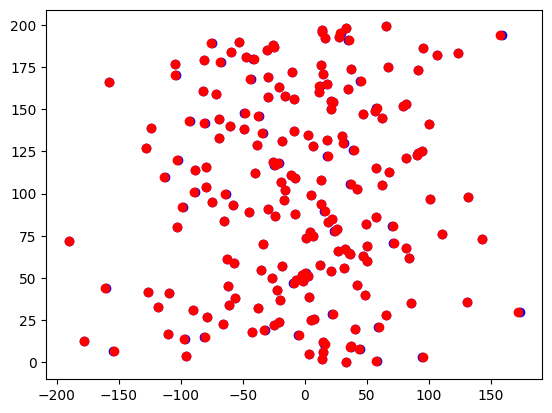

In [75]:
plt.scatter(y_test, range(200), color = 'blue')
plt.scatter(y_pred, range(200), color = 'red')